## COOKBOOK NOTEBOOK for GRAPHICAL ELEMENTS

1. shape, size and form <br>
2. translation, rotation <br>
3. color and transparency <br>
4. transformation <br>
5. data-driven <br>

In [1]:
# all the packages and modules we'll need for now. will import more later. 
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.patches as patches
from matplotlib import cm

import sys
sys.path.append('./modules/')
from importlib import reload
from IPython.display import HTML

%matplotlib inline

### (1) shape, size, form

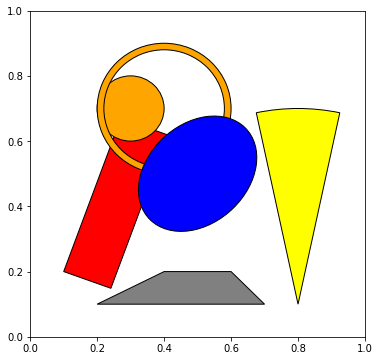

In [2]:
# matplotlib patches
# https://matplotlib.org/api/patches_api.html
# useful explanation of fig, axes, etc. 
# https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python

fig, ax = plt.subplots(figsize=(6, 6))

# SHAPES
# NOTE THAT THE SEQUENCE IN WHICH THEY ARE PLOTTED DETERMINES THE LAYERING FROM BOTTOM(first) TO TOP (last):

#rectangle
# xy = (left, bottom)
xy = (0.1,0.2)
width = 0.15
height = 0.5
angle = -20 
r1 = patches.Rectangle(xy, width, height, angle, facecolor='red', edgecolor='black')
ax.add_patch(r1)

# circle
# xy = (x_center, y_center)
xy = (0.3,0.7) 
c1 = patches.Circle(xy, radius=0.1, facecolor='orange', edgecolor='black')
ax.add_patch(c1)

# ring
# xy = (x_center, y_center)
xy = (0.4,0.7) 
ring1 = patches.Wedge(xy, r=0.2, theta1=0, theta2=360, width=0.02, facecolor='orange', edgecolor='black')
ax.add_patch(ring1)

# ellipse
xy = (0.5,0.5) 
width = 0.3
height = 0.4
e1 = patches.Ellipse(xy, width, height, angle=-45, facecolor='blue', edgecolor='black')
ax.add_patch(e1)

# wedge
center = (0.8,0.1)
ctheta = 90.0
dtheta = 12.0
r = 0.6
theta1 = ctheta-dtheta
theta2 = ctheta+dtheta
w1 = patches.Wedge(center, r, theta1, theta2, width=None, facecolor='yellow', edgecolor='black')
ax.add_patch(w1)

# polygon
xy = [[0.2,0.1],[0.7,0.1],[0.6,0.2],[0.4,0.2]]
p1 = patches.Polygon(xy, closed=True, facecolor='grey', edgecolor='black')
ax.add_patch(p1)

plt.show()

### (2) translation, rotation

(0.2, 0.1)
(0.26363636363636367, 0.15454545454545454)
(0.32727272727272727, 0.2090909090909091)
(0.3909090909090909, 0.26363636363636367)
(0.45454545454545453, 0.3181818181818182)
(0.5181818181818181, 0.3727272727272727)
(0.5818181818181818, 0.42727272727272725)
(0.6454545454545455, 0.4818181818181818)
(0.709090909090909, 0.5363636363636364)
(0.7727272727272727, 0.5909090909090909)
(0.8363636363636362, 0.6454545454545454)
(0.9, 0.7)


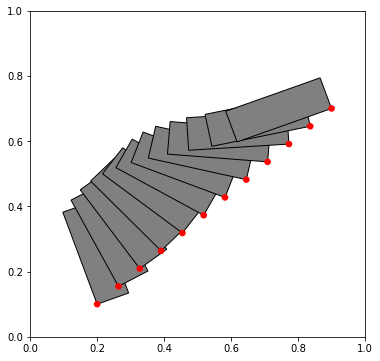

In [3]:
# STATIC 
# translation, rotation

fig, ax = plt.subplots(figsize=(6, 6))

# what do you want to vary? 
# just position
N = 12
x = np.linspace(0.2,0.9,N)
y = np.linspace(0.1,0.7,N)
#angle = np.linspace(0,0,N)
angle = np.linspace(20,110,N)

# constant values: 
height = 0.3
width = 0.1
patch_list = []
rdot_list = []

# make a list of patch objects
for x1, y1, deg in zip(x, y, angle):
    lefbot = (x1,y1)
    print(lefbot)
    patch1 = patches.Rectangle(lefbot, width, height, deg, facecolor='grey', edgecolor='black')
    patch_list.append(patch1)
    rdot_patch = patches.Circle(lefbot,0.01,fc='red')
    rdot_list.append(rdot_patch)

# then loop over that list and add the patch objects to the axes: 
for padd in patch_list:
    ax.add_patch(padd)
for dot in rdot_list:
    ax.add_patch(dot)

## =======================================
## Color and combinations


(0.0, 1.0, 0.0, 1.0)

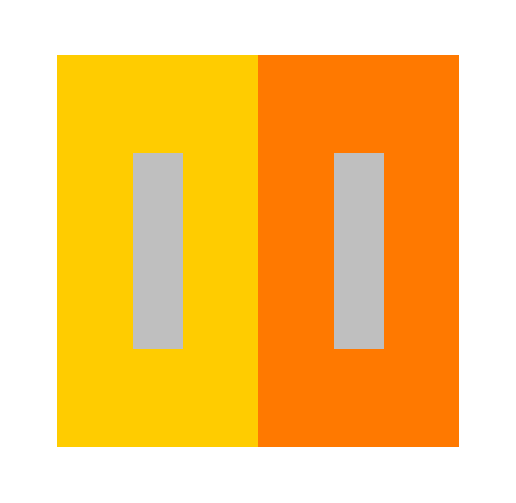

In [44]:
# make an Albers experiment ! 
# https://cre8math.com/2015/09/05/josef-albers-and-interaction-of-color/
# a different way: 
# https://introcs.cs.princeton.edu/python/31datatype/alberssquares.py.html

# Colormaps: 
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# higher level colormaps:     
# https://matplotlib.org/cmocean/
# https://towardsdatascience.com/beautiful-custom-colormaps-with-matplotlib-5bab3d1f0e72
# https://www.analyticsvidhya.com/blog/2020/09/colormaps-matplotlib/
# and of course: 
# xkcd colors: https://xkcd.com/color/rgb/



# COLOR
N=100
cvals = np.linspace(0.3,0.9,N)
cmap = cm.Greys

ic = 11
c = cvals[ic]
col_in = cmap(c)

# ======================
# colormap for the outer rectangles
cmap = cm.autumn
c = cvals[29]
col_outR = cmap(c)
c = cvals[82]
col_outL = cmap(c)

fig, ax = plt.subplots(figsize=(9, 9))
# SPACE
w_out = 0.4
w_in = 0.1

dy = 0.2
dx = 0.15

bot_out = 0.1
bot_in = bot_out+dy

h_out = 0.8
h_in = 0.4

xl = 0.1
lefbot_Lout = (xl,bot_out)
lefbot_Lin = (xl+dx,bot_in)
lefbot_Rout = (xl+w_out,bot_out)
lefbot_Rin = (xl+w_out+dx,bot_in)

ec = 'none'
r_out_L = patches.Rectangle(lefbot_Lout, w_out, h_out, facecolor=col_outL, edgecolor=ec)
r_in_L = patches.Rectangle(lefbot_Lin, w_in, h_in, facecolor=col_in, edgecolor=ec)

r_out_R = patches.Rectangle(lefbot_Rout, w_out, h_out, facecolor=col_outR, edgecolor=ec)
r_in_R = patches.Rectangle(lefbot_Rin, w_in, h_in, facecolor=col_in, edgecolor=ec)

ax.add_patch(r_out_L)
ax.add_patch(r_out_R)
ax.add_patch(r_in_L)
ax.add_patch(r_in_R)

plt.axis('off')

### (3) Color and transparency

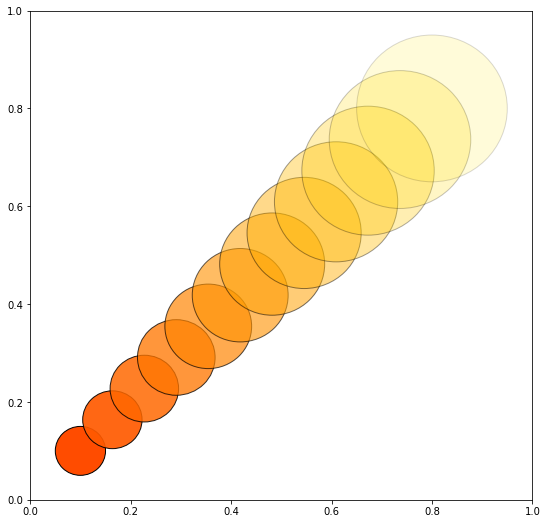

In [45]:
# color, transparency

fig, ax = plt.subplots(figsize=(9, 9))

# what do you want to vary? 
# just position
N = 12
x = np.linspace(0.1,0.8,N)
y = np.linspace(0.1,0.8,N)
radius = np.linspace(0.05,0.15,N)
alpha = np.linspace(1.0,0.15,N)

cval = np.linspace(0.3,0.9,N)
cmap = cm.autumn

# constant values: 

rdot_list = []

for x1, y1, rad, alf, c in zip(x, y, radius, alpha, cval):
    center = (x1,y1)
    col = cmap(c)
    d1 = patches.Circle(center, rad, alpha=alf, facecolor=col, edgecolor='black')
    rdot_list.append(d1)
    
for dot in rdot_list:
    ax.add_patch(dot)

### (4) transformation 

In [5]:
# SOOO... this is harder.. i didnt have time to figure it out, 
# but there are many ways to approach this.. i will get to it soon ! 

### (5) data-driven 

      hum  temp_C  time_s
0  28.922   25.13  0.0000
1  28.854   25.12  0.3852
2  28.786   25.12  0.7701
3  28.686   25.14  1.1554
4  28.626   25.24  1.5403
0.3780000000000001
99
37.42200000000001
37.2653


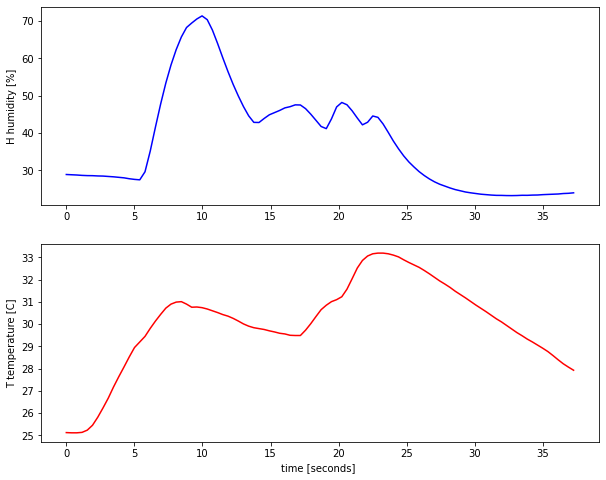

In [16]:
# READ IN THE DATA FILE ! ! !

datafilename = '../data/breathalyzer/y2020-02-13_anna1_37s.pkl'
#datafilename = '../data/pizzadevils_120s.pkl'
breath = pd.read_pickle(datafilename) # np.loadtxt(datafilename)
print(breath[0:5])
time = np.array(breath.time_s)
p1 = temp_C = np.array(breath.temp_C)
p2 = humidity = np.array(breath.hum)


dt =  time[-1]-time[-2]
print(dt)
print(len(time))
print(dt*len(time))
print(time[-1])

# PLOT THE DATA AS CURVES... 
fig = plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.plot(time,humidity,'b-')
#plt.xlabel('time')
plt.ylabel('H humidity [%]')

plt.subplot(2,1,2)
plt.plot(time,temp_C,'r-')
plt.xlabel('time [seconds] ')
plt.ylabel('T temperature [C]')

plt.show()

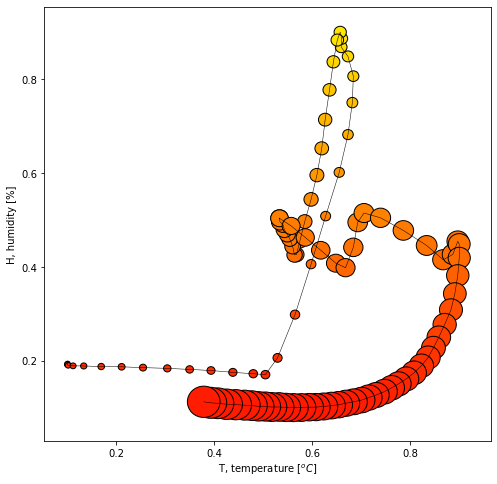

In [17]:
# tutorials on matplotlib patches: 

# ==================================================
# initialize the objects
fig = plt.figure(figsize=(8,8))
axes1 = plt.subplot(1,1,1) 
# when do you need an axes object? 

tempC_n = np.interp(temp_C,[min(temp_C),max(temp_C)],[0.1,0.9])
humidity_n = np.interp(humidity,[min(humidity),max(humidity)],[0.1,0.9])

axes1.plot(tempC_n,humidity_n,'k-', lw=0.5);
axes1.set_xlabel('T, temperature [$^o C$]')
axes1.set_ylabel('H, humidity [%]')

rad_vec = np.linspace(1/200,1/30,len(humidity_n))
humidity_n_vec = np.linspace(min(humidity_n),max(humidity_n),100)
cmap = cm.autumn

patch_list = []
for ind,val in enumerate(humidity_n):
    rad = rad_vec[ind]
    c_hum = cmap(val)
    patch1 = patches.Circle((tempC_n[ind], humidity_n[ind]), rad, fc=c_hum, ec='k')
    patch_list.append(patch1)

    
for padd in patch_list:
    axes1.add_patch(padd)


print(patch_list[34])


In [18]:
# ==========================================
# stuff to play with-- find when we need these scaling things... 
# here we are using the class above to scale the ellipse axes to the data so they are round dots. 
#dot1_width = GraphDist(rad_pix, axes1, True)
#dot1_height = GraphDist(rad_pix, axes1, False)
#dot2_width = GraphDist(rad_pix, axes2, True)
#dot2_height = GraphDist(rad_pix, axes2, False)

# patch2 = patches.Ellipse((time[0], temp_C[0]), dot2_width, dot2_height, fc='blue')

Circle(xy=(0.584758, 0.496344), radius=0.0148299)


## ADD A BACKGROUND IMAGE ! 
### Infinitely useful to us all ! 


661 830 4


(-0.5, 871.525, 694.075, -0.5)

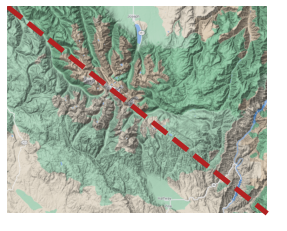

In [52]:
# https://stackoverflow.com/questions/34458251/plot-over-an-image-background-in-python/34459284
# import matplotlib.image as mpimg
%matplotlib inline

import matplotlib.image as mpimg

bg_image = '../data/WallowaMtnsOR.png'
img=mpimg.imread(bg_image)
sz_x,sz_y,col_depth = img.shape
print(sz_x,sz_y,col_depth)

# get pixel dimensions of the image: 
# The returned array has shape: 
# (M, N) for grayscale images.
# (M, N, 3) for RGB images.
# (M, N, 4) for RGBA images.

fig, ax = plt.subplots()
npts = 20
x = np.linspace(0,sz_x,npts) # make this read from image or be predefined and the image placed !
y = np.linspace(0,sz_y,npts)
ax.imshow(img) #, extent=[0, 400, 0, 300])
ax.plot(y,x, '--', linewidth=5, color='firebrick')

# probably need to make a second set of axes that sit right on top of the image: 
# for padd in patch_list:
#    ax.add_patch(padd)
ax.axis('off')